## Importing The Libaries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns',None)

## Loading The Data

In [3]:
# reading csv file UScomments.csv
US_comments = pd.read_csv('UScomments.csv', error_bad_lines=False)

b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'


In [4]:
# reading csv file USvideos.csv
US_videos = pd.read_csv('USvideos.csv', error_bad_lines=False)

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


## Exploratory Analysis and Data Cleaning 

In [5]:
# getting first 5 rows of USvideos.csv
US_videos.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09


In [6]:
# get the no. of rows and columns
US_videos.shape

(7992, 11)

In [7]:
# getting no. of distinct observations
US_videos.nunique()

video_id          2364
title             2398
channel_title     1230
category_id         16
tags              2204
views             7939
likes             6624
dislikes          2531
comment_total     4152
thumbnail_link    2364
date                40
dtype: int64

In [8]:
# print information about the file
US_videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7992 entries, 0 to 7991
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   video_id        7992 non-null   object 
 1   title           7992 non-null   object 
 2   channel_title   7992 non-null   object 
 3   category_id     7992 non-null   int64  
 4   tags            7992 non-null   object 
 5   views           7992 non-null   int64  
 6   likes           7992 non-null   int64  
 7   dislikes        7992 non-null   int64  
 8   comment_total   7992 non-null   int64  
 9   thumbnail_link  7992 non-null   object 
 10  date            7992 non-null   float64
dtypes: float64(1), int64(5), object(5)
memory usage: 686.9+ KB


In [9]:
# getting first 5 rows of USvideos.csv
US_videos.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09


In [10]:
# getting first 5 rows of UScomments.csv
US_comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [11]:
# get the no. of rows and columns
US_comments.shape

(691400, 4)

In [12]:
# getting sum of null values
US_comments.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [13]:
# dropping rows and columns with null values
US_comments.dropna(inplace=True)

In [14]:
US_comments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [15]:
# getting np. of rows and columns
US_comments.shape

(691375, 4)

In [16]:
# getting no. of distinct observations
US_comments.nunique()

video_id          2266
comment_text    434076
likes             1284
replies            479
dtype: int64

In [17]:
# printing information about the file
US_comments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 691375 entries, 0 to 691399
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   video_id      691375 non-null  object
 1   comment_text  691375 non-null  object
 2   likes         691375 non-null  object
 3   replies       691375 non-null  object
dtypes: object(4)
memory usage: 26.4+ MB


In [18]:
# dropping a particular row
US_comments.drop(41587, inplace=True)

In [19]:
# resetting the indexes
US_comments = US_comments.reset_index().drop('index',axis=1)

In [20]:
# changing the data type 
US_comments.likes = US_comments.likes.astype(int)
US_comments.replies = US_comments.replies.astype(int)

In [21]:
US_comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


## Removing Punctuations, Numbers and Special Characters.

In [22]:
US_comments['comment_text'] = US_comments['comment_text'].str.replace("[^a-zA-Z#]", " ")

## Removing Short Words. 

In [23]:
US_comments['comment_text'] = US_comments['comment_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

## Changing the text to lower case. 

In [24]:
US_comments['comment_text'] = US_comments['comment_text'].apply(lambda x:x.lower())

## Tokenization 

Tokenization is the process of converting text into tokens before transforming it into vectors. It is also easier to filter out unnecessary tokens. For example, a document into paragraphs or sentences into words

In [25]:
tokenized_tweet = US_comments['comment_text'].apply(lambda x: x.split())
tokenized_tweet.head()

0                                        [logan, paul]
1    [been, following, from, start, your, vine, cha...
2                                     [kong, maverick]
3                                         [attendance]
4                                           [trending]
Name: comment_text, dtype: object

## Lemmatization 

This process finds the base or dictionary form of the word known as the lemma. This is done through the use of vocabulary (dictionary importance of words) and morphological analysis (word structure and grammar relations). 

In [26]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [27]:
wnl = WordNetLemmatizer()

In [28]:
tokenized_tweet.apply(lambda x: [wnl.lemmatize(i) for i in x if i not in set(stopwords.words('english'))]) 
tokenized_tweet.head()

0                                        [logan, paul]
1    [been, following, from, start, your, vine, cha...
2                                     [kong, maverick]
3                                         [attendance]
4                                           [trending]
Name: comment_text, dtype: object

In [29]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

In [30]:
US_comments['comment_text'] = tokenized_tweet

## Sentiment Analysis  


In [31]:
# importing library for nlp 
import nltk

# downloading vader lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tuhini\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [32]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

## Setting The Sentiment Scores

In [33]:
US_comments['Sentiment Scores'] = US_comments['comment_text'].apply(lambda x:sia.polarity_scores(x)['compound'])

In [34]:
US_comments.head()

,video_id,comment_text,likes,replies,Sentiment Scores
0,XpVt6Z1Gjjo,logan paul,4,0,0.0
1,XpVt6Z1Gjjo,been following from start your vine channel ha...,3,0,0.0
2,XpVt6Z1Gjjo,kong maverick,3,0,0.0
3,XpVt6Z1Gjjo,attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending,3,0,0.0


## Classifying the Sentiment scores as Positive, Negative and Neutral 

In [35]:
US_comments['Sentiment'] = US_comments['Sentiment Scores'].apply(lambda s : 'Positive' if s > 0 else ('Neutral' if s == 0 else 'Negative'))

In [36]:
US_comments.head()

,video_id,comment_text,likes,replies,Sentiment Scores,Sentiment
0,XpVt6Z1Gjjo,logan paul,4,0,0.0,Neutral
1,XpVt6Z1Gjjo,been following from start your vine channel ha...,3,0,0.0,Neutral
2,XpVt6Z1Gjjo,kong maverick,3,0,0.0,Neutral
3,XpVt6Z1Gjjo,attendance,3,0,0.0,Neutral
4,XpVt6Z1Gjjo,trending,3,0,0.0,Neutral


In [37]:
# getting count of positive , negetive and neutral comments
US_comments.Sentiment.value_counts()

Positive    305358
Neutral     260986
Negative    125030
Name: Sentiment, dtype: int64

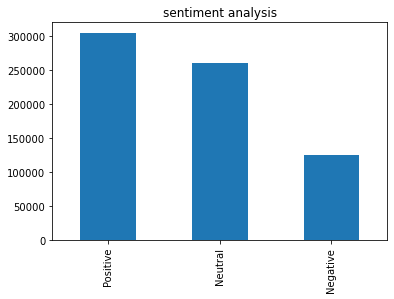

In [54]:
US_comments.Sentiment.value_counts().plot(kind='bar',title="sentiment analysis")

## Calculating Positive Percentage 

In [38]:
videos = []
for i in range(0,US_comments.video_id.nunique()):
    a = US_comments[(US_comments.video_id == US_comments.video_id.unique()[i]) & (US_comments.Sentiment == 'Positive')].count()[0]
    b = US_comments[US_comments.video_id == US_comments.video_id.unique()[i]]['Sentiment'].value_counts().sum()
    Percentage = (a/b)*100
    videos.append(round(Percentage,2))

## Making a dataframe of the videos with their Positive Percentages 

In [39]:
# making a new dataframe
Positivity = pd.DataFrame(videos,US_comments.video_id.unique()).reset_index()

In [40]:
#columns in dataframe
Positivity.columns = ['video_id','Positive Percentage']

In [41]:
Positivity.head()

,video_id,Positive Percentage
0,XpVt6Z1Gjjo,34.38
1,cLdxuaxaQwc,35.54
2,WYYvHb03Eog,37.25
3,sjlHnJvXdQs,37.62
4,cMKX2tE5Luk,41.57


## Adding channel name to dataframe 

In [42]:
channels = []
for i in range(0,Positivity.video_id.nunique()):
    channels.append(US_videos[US_videos.video_id == Positivity.video_id.unique()[i]]['channel_title'].unique()[0])

In [43]:
Positivity['Channel'] = channels

In [44]:
Positivity.head()

,video_id,Positive Percentage,Channel
0,XpVt6Z1Gjjo,34.38,Logan Paul Vlogs
1,cLdxuaxaQwc,35.54,PewDiePie
2,WYYvHb03Eog,37.25,The Verge
3,sjlHnJvXdQs,37.62,jacksfilms
4,cMKX2tE5Luk,41.57,A24


### Getting videos and channels with 100% positive comments 

In [45]:
Positivity[Positivity['Positive Percentage'] == Positivity['Positive Percentage'].max()]

,video_id,Positive Percentage,Channel
395,cviyIIvBlto,100.0,Kerry Wong
424,jLa9wZHiqxg,100.0,Rad Universe
466,S-a8NVEUO4E,100.0,E! Live from the Red Carpet
601,wBjAmThxDpA,100.0,Vertical Entertainment LA
612,_zl2GV89_GM,100.0,Cosmic Book News
821,lJj66BCiZWQ,100.0,Eric Blattberg
972,BNRUV3TuExQ,100.0,Fathom Events
1317,zuKX0fPlo2Q,100.0,Thomas Bikias
1454,Ekc7lWx0468,100.0,The Illusion contest
1539,HjfN2Phsfng,100.0,weatherguru76


### Getting channels with 0 % positive percentage i.e either negetive or neutral comments 

In [46]:
Positivity[Positivity['Positive Percentage'] == Positivity['Positive Percentage'].min()]

,video_id,Positive Percentage,Channel
117,3hq2c9vdfls,0.0,Cal Bears
151,7Ag2oDIeLvo,0.0,OsbornTramain
420,p7sooI96zPI,0.0,Geezus66
468,Oz88_p125uM,0.0,ViralVideoUK
592,BfxOimRxXvU,0.0,Andro Hack
604,k8LF_FU2luY,0.0,Bollinger Motors
611,tbDr_zAcM5g,0.0,Maharishi University of Management
629,HpxsQ1_UAec,0.0,Manto kay SO Afsanay
811,EZaPeQ2dxh8,0.0,Malhar Takle
819,D6zUj1tKxiU,0.0,Xposure 365 TV


## Wordcloud of most frequent comments 

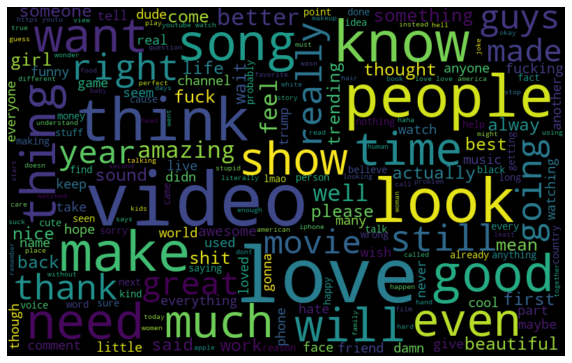

In [47]:
all_words = ' '.join([text for text in US_comments['comment_text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Wordcloud of Positive Comments 

In [48]:
all_words_posi = ' '.join([text for text in US_comments['comment_text'][US_comments.Sentiment == 'Positive']])

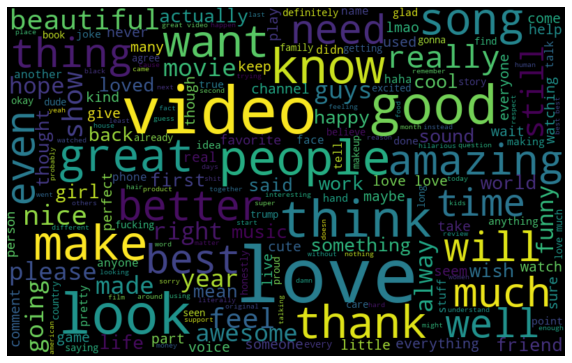

In [49]:
wordcloud_posi = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_posi)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_posi, interpolation="bilinear")
plt.axis('off')
plt.show()

## Wordcloud of Negative Comments 

In [50]:
all_words_nega = ' '.join([text for text in US_comments['comment_text'][US_comments.Sentiment == 'Negative']])

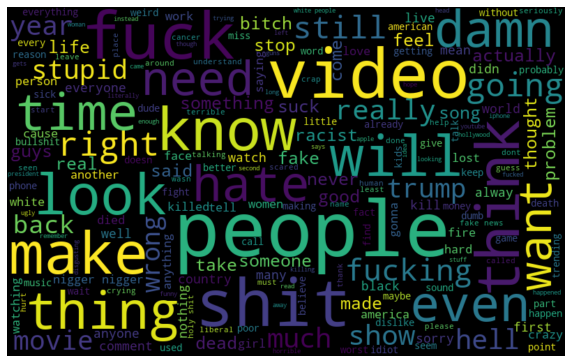

In [51]:
wordcloud_nega = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_nega)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_nega, interpolation="bilinear")
plt.axis('off')
plt.show()

## Wordcloud of Neutral Comments 

In [52]:
all_words_neu = ' '.join([text for text in US_comments['comment_text'][US_comments.Sentiment == 'Neutral']])

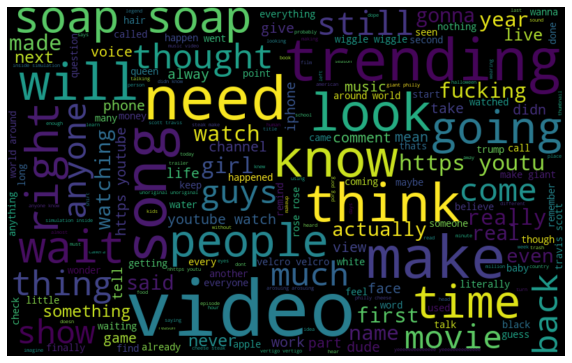

In [53]:
wordcloud_neu = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_neu)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_neu, interpolation="bilinear")
plt.axis('off')
plt.show()